In [1]:
import os
import re
import glob
import matplotlib.pyplot as plt
import numpy as np
import json
from tqdm import tqdm

In [2]:
fig_folder = 'figures'
os.makedirs(fig_folder, exist_ok=True)

In [3]:
analysis_log_folder  = 'analysis_log'

In [4]:
# compute the total duration of every 24 / 14.31 * 3600 seconds
one_round_time_interval = 24 / 14.31 * 3600 * 1000
print(one_round_time_interval)

6037735.849056604


In [5]:
# plot num station - average connection time
sat_0_mean_round_connection = []
sat_1_mean_round_connection = []
sat_0_std_round_connection = []
sat_1_std_round_connection = []
num_gs_list = set()
# sort sat_log_folder_list by num_gs
# get all the sat(0/1)_round_connection_stat_*.json files in analysis_log_folder
sat_round_connection_stat_file_path_list = glob.glob(os.path.join(analysis_log_folder, 'sat*_round_connection_stat_*.json'))
# sort the file path list by num_gs
sat_round_connection_stat_file_path_list.sort(key=lambda x:int(x.split('_')[-1].split('.')[0]))
for sat_round_connection_stat_file_path in sat_round_connection_stat_file_path_list:
    # get the number of gs
    num_gs = int(sat_round_connection_stat_file_path.split('_')[-1].split('.')[0])
    # get the satellite id
    sat_id = int(sat_round_connection_stat_file_path.split('_')[1][-1])
    # read satellite round-wise connection duration
    with open(sat_round_connection_stat_file_path, 'r') as load_f:
        sat_round_connection_stat = json.load(load_f)
    # append to list
    if sat_id == 0:
        sat_0_mean_round_connection.append(sat_round_connection_stat['mean'])
        sat_0_std_round_connection.append(sat_round_connection_stat['std'])
    elif sat_id == 1:
        sat_1_mean_round_connection.append(sat_round_connection_stat['mean'])
        sat_1_std_round_connection.append(sat_round_connection_stat['std'])
    else:
        raise NotImplementedError('Wrong SID parsed')
    num_gs_list.add(num_gs)
num_gs_list = sorted(list(num_gs_list))

[ 6.15140845  9.40422535 14.55117371 17.14778555 17.31666667 18.95932401
 19.35431235 21.13811189 22.37948718 23.20874126]
[ 6.13814554  9.46467136 14.59483568 17.25932401 17.33356643 18.96200466
 19.44417249 21.2479021  22.39300699 23.21689977]


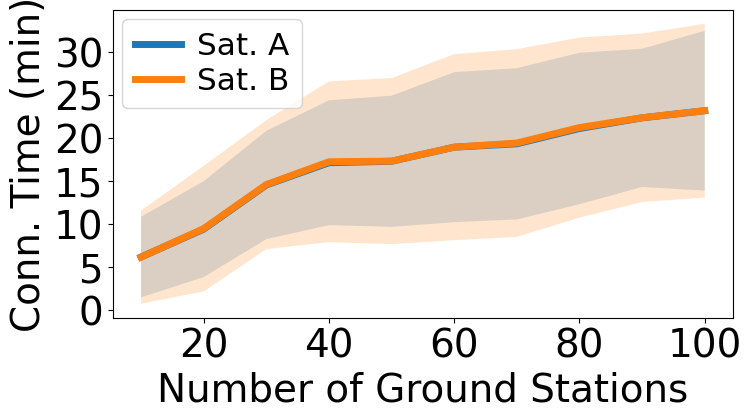

In [6]:
# plot 
fig = plt.figure(figsize=(8,4))

font_size = 28

sat_0_mean_round_connection = np.array(sat_0_mean_round_connection)
sat_1_mean_round_connection = np.array(sat_1_mean_round_connection)
sat_0_std_round_connection = np.array(sat_0_std_round_connection)
sat_1_std_round_connection = np.array(sat_1_std_round_connection)


print(sat_0_mean_round_connection / 60000)
print(sat_1_mean_round_connection / 60000)

plt.plot(num_gs_list, sat_0_mean_round_connection / 60000, label='Sat. A', linewidth=5)
plt.plot(num_gs_list, sat_1_mean_round_connection / 60000, label='Sat. B', linewidth=5)

plt.fill_between(num_gs_list, sat_0_mean_round_connection / 60000 - sat_0_std_round_connection / 60000, sat_0_mean_round_connection / 60000 + sat_0_std_round_connection / 60000, alpha = 0.2)
plt.fill_between(num_gs_list, sat_1_mean_round_connection / 60000 - sat_1_std_round_connection / 60000, sat_1_mean_round_connection / 60000 + sat_1_std_round_connection / 60000, alpha = 0.2)

plt.legend(fontsize=font_size * 0.8, loc='upper left', handlelength=1.5, handletextpad=0.5, labelspacing=0.2, bbox_to_anchor=(-0.01, 1.02))
plt.xlabel('Number of Ground Stations', fontsize=font_size)
plt.ylabel('Conn. Time (min)', fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.savefig(os.path.join(fig_folder, 'fig1a_num_gs_sat_conn_duration.pdf'), bbox_inches='tight')
plt.savefig(os.path.join(fig_folder, 'fig1a_num_gs_sat_conn_duration.png'), bbox_inches='tight')

plt.show()